## Assignment 10
### Yousof Rahimian

### Assignment 10.1

**Implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.**

### 10.1.a

**Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.**

In [1]:
import string

In [2]:
def tokenize(sentence):
    tokens = []
    
    # split sentence into words by space
    words = sentence.split()
    
    # convert to lowercase
    words = [word.lower() for word in words]
    
    # remove punctuation
    tokens = [word.translate(string.punctuation) for word in words]

    return tokens

In [3]:
quote = "Two things are infinite: the universe and human stupidity; and I'm not sure about the universe."
quote

"Two things are infinite: the universe and human stupidity; and I'm not sure about the universe."

In [4]:
words_token = tokenize(quote)
print(words_token)

['two', 'things', 'are', 'infinite:', 'the', 'universe', 'and', 'human', 'stupidity;', 'and', "i'm", 'not', 'sure', 'about', 'the', 'universe.']


### 10.1.b

**Implement an `ngram` function that splits tokens into N-grams.**

In [5]:
def ngram(tokens, n):
    ngrams = []
    
    # Create ngram
    ngrams_zip = zip(*[tokens[i:] for i in range(n)])
    
    ngrams = [' '.join(grams) for grams in ngrams_zip]
    
    return ngrams

In [6]:
words_ngrams = ngram(words_token, 3)
print(words_ngrams)

['two things are', 'things are infinite:', 'are infinite: the', 'infinite: the universe', 'the universe and', 'universe and human', 'and human stupidity;', 'human stupidity; and', "stupidity; and i'm", "and i'm not", "i'm not sure", 'not sure about', 'sure about the', 'about the universe.']


### 10.1.c

**Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.**

In [7]:
import numpy as np

In [8]:
def one_hot_encode(tokens, num_words = 100):
    token_index = {}
    
    for word in tokens:
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
    max_length = 10
    
    results = np.zeros(shape = (len(tokens), 
                       max_length,
                       max(token_index.values()) + 1))
    
    for i, word in enumerate(tokens):
        for j, word in list(enumerate(tokens))[:max_length]:
            index = token_index.get(word)
            results[i, j, index] = 1
    
    return results

In [9]:
words_one_hot = one_hot_encode(words_token)
print(words_one_hot[1:5])

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0

### Assignment 10.2

**Train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.**

In [10]:
import os
import matplotlib.pyplot as plt

from pathlib import Path
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [11]:
current_dir = Path(os.getcwd()).absolute()

imdb_dir = '../../../data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
test_dir = os.path.join(imdb_dir, 'test')

In [12]:
# process the labels on the raw IMDB data
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)

    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()

            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)           

In [13]:
# cutoff reviews after 100 words
maxlen = 100

# train on 200 samples
training_samples = 100

# validate on 10,000 samples
validation_samples = 10000

# Consider only top 10000 words in dataset
max_words = 10000

In [14]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [15]:
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 88582 unique tokens.


In [16]:
data = pad_sequences(sequences, maxlen = maxlen)

In [17]:
labels = np.asarray(labels)
print(f'Shape of data tensor: {data.shape}')
print(f'Shape of label tensor: {labels.shape}')

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [18]:
indicies = np.arange(data.shape[0])
np.random.shuffle(indicies)
data = data[indicies]
labels = labels[indicies]

In [19]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [20]:
# train model
embedding_dim = 100

model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/10
4/4 [==============================] - 2s 408ms/step - loss: 0.6925 - acc: 0.4900 - val_loss: 0.6919 - val_acc: 0.5216
Epoch 2/10
4/4 [==============================] - 1s 241ms/step - loss: 0.4774 - acc: 1.0000 - val_loss: 0.6913 - val_acc: 0.5239
Epoch 3/10
4/4 [==============================] - 1s 248ms/step - loss: 0.3194 - acc: 1.0000 - val_loss: 0.6936 - val_acc: 0.5123
Epoch 4/10
4/4 [==============================] - 1s 254ms/step - loss: 0.1735 - acc: 1.0000 - val_loss: 0.7053 - val_acc: 0.5232
Epoch 5/10
4/4 [==============================] - 1s 261ms/step - loss: 0.1030 - acc: 1.0000 - val_loss: 0.6972 - val_acc: 0.5189
Epoch 6/10
4/4 [==============================] - 1s 256ms/step - loss: 0.0575 - acc: 1.0000 - val_loss: 0.6985 - val_acc: 0.5242
Epoch 7/10
4/4 [==============================] - 1s 277ms/step - loss: 0.0369 - acc: 1.0000 - val_loss: 0.7030 - val_acc: 0.5179
Epoch 8/10
4/4 [==============================] - 1s 256ms/step - loss: 0.0244 - acc: 1.00

In [22]:
# tokenize the dataset of the test data
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)

    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()

            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)   
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

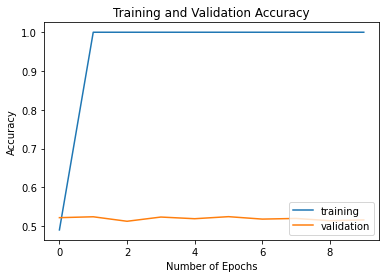

In [23]:
# plot training vs validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')

plt.show()

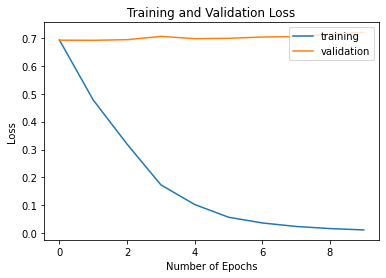

In [24]:
# Plot training vs validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='upper right')

plt.show()

In [25]:
# Evaluate the model
eval = model.evaluate(x_test, y_test)
print(f'Model Accuracy: {eval[1] * 100:.1f}%')
print(f'Model Loss: {eval[0]:.3f}')

782/782 [==============================] - 3s 3ms/step - loss: 0.7221 - acc: 0.5100
Model Accuracy: 51.0%
Model Loss: 0.722


### Assignment 10.3

**Fit the same data with an LSTM layer**

In [26]:
from keras.layers import LSTM

In [27]:
# number of words to consider as features
max_features = 10000

In [28]:
# useing the LSTM layer
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6920 - acc: 0.6000 - val_loss: 0.6941 - val_acc: 0.4500
Epoch 2/10
1/1 [==============================] - 0s 90ms/step - loss: 0.6836 - acc: 0.6125 - val_loss: 0.6959 - val_acc: 0.4500
Epoch 3/10
1/1 [==============================] - 0s 89ms/step - loss: 0.6754 - acc: 0.5875 - val_loss: 0.6983 - val_acc: 0.4500
Epoch 4/10
1/1 [==============================] - 0s 82ms/step - loss: 0.6654 - acc: 0.5875 - val_loss: 0.7019 - val_acc: 0.4500
Epoch 5/10
1/1 [==============================] - 0s 86ms/step - loss: 0.6525 - acc: 0.5875 - val_loss: 0.7081 - val_acc: 0.4500
Epoch 6/10
1/1 [==============================] - 0s 83ms/step - loss: 0.6350 - acc: 0.5875 - val_loss: 0.7219 - val_acc: 0.4500
Epoch 7/10
1/1 [==============================] - 0s 87ms/step - loss: 0.6082 - acc: 0.5875 - val_loss: 0.7827 - val_acc: 0.4500
Epoch 8/10
1/1 [==============================] - 0s 78ms/step - loss: 0.5634 - acc: 0.5875 - val_l

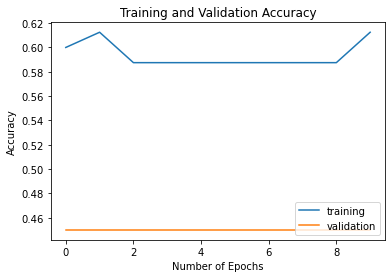

In [30]:
# plot training vs validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')

plt.show()

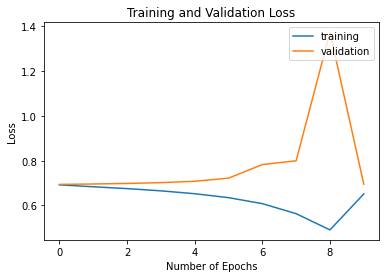

In [31]:
# Plot training vs validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='upper right')

plt.show()

In [32]:
# Evaluate the model
eval = model.evaluate(x_test, y_test)
print(f'Model Accuracy: {eval[1] * 100:.1f}%')
print(f'Model Loss: {eval[0]:.3f}')

782/782 [==============================] - 10s 12ms/step - loss: 0.6889 - acc: 0.5156
Model Accuracy: 51.6%
Model Loss: 0.689


## Assignment 10.4

**Fit the same data with a simple 1D convnet.**

In [33]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import RMSprop

In [34]:
max_len = 100

model = Sequential()

model.add(Embedding(max_features, 128, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 94, 32)            28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                

In [35]:
model.compile(optimizer = RMSprop(learning_rate = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 2/10
1/1 [==============================] - 0s 117ms/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 3/10
1/1 [==============================] - 0s 78ms/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 4/10
1/1 [==============================] - 0s 84ms/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 5/10
1/1 [==============================] - 0s 68ms/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 6/10
1/1 [==============================] - 0s 69ms/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 7/10
1/1 [==============================] - 0s 80ms/step - loss: 6.3628 - acc: 0.5875 - val_loss: 8.4837 - val_acc: 0.4500
Epoch 8/10
1/1 [==============================] - 0s 83ms/step - loss: 6.3628 - acc: 0.5875 - val_

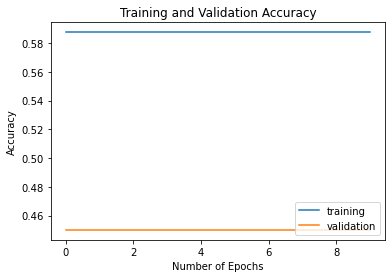

In [36]:
# plot training vs validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')

plt.show()

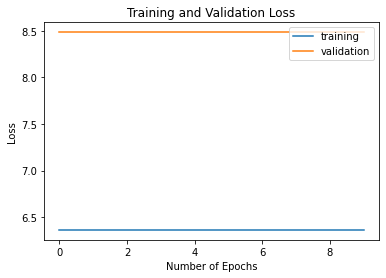

In [37]:
# Plot training vs validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='upper right')

plt.show()

In [38]:
# Evaluate the model
eval = model.evaluate(x_test, y_test)
print(f'Model Accuracy: {eval[1] * 100:.1f}%')
print(f'Model Loss: {eval[0]:.3f}')

782/782 [==============================] - 3s 4ms/step - loss: 7.6844 - acc: 0.5000
Model Accuracy: 50.0%
Model Loss: 7.684
